In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
train = pd.read_csv('train.csv', parse_dates=['Dates'])

In [3]:
print(train.shape)
train.head()

(878049, 9)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
Dates         878049 non-null datetime64[ns]
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 60.3+ MB


## EDA

** Explore Dates **

In [5]:
train["Dates-year"] = train['Dates'].dt.year
train["Dates-month"] = train['Dates'].dt.month
train["Dates-day"] = train['Dates'].dt.day
train["Dates-hour"] = train['Dates'].dt.hour
train["Dates-minute"] = train['Dates'].dt.minute
train["Dates-second"] = train['Dates'].dt.second

In [6]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23,33,0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23,30,0
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23,30,0


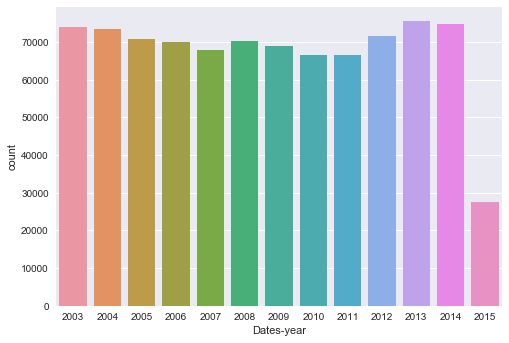

In [7]:
# 년도별 
sns.countplot(data=train, x='Dates-year')

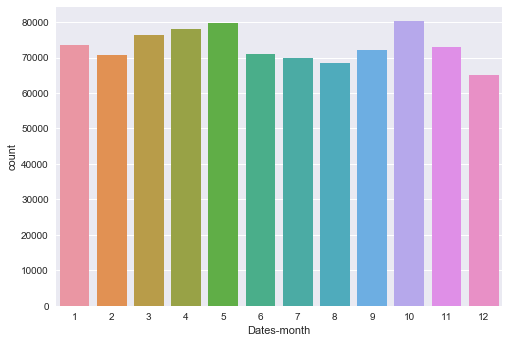

In [8]:
# 월별
sns.countplot(data=train, x='Dates-month')

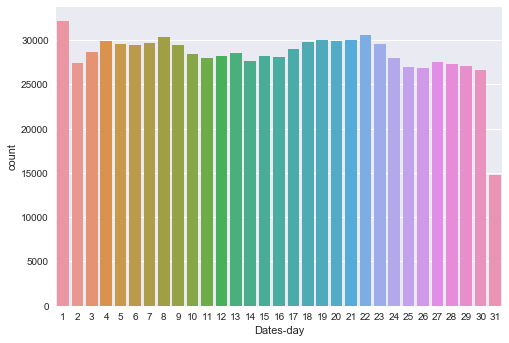

In [9]:
# 날짜별
sns.countplot(data=train, x='Dates-day')

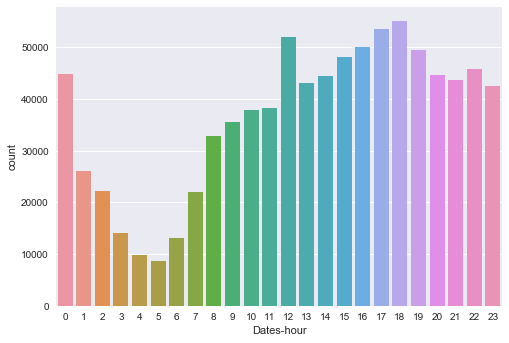

In [10]:
# 시간별
sns.countplot(data=train, x='Dates-hour')

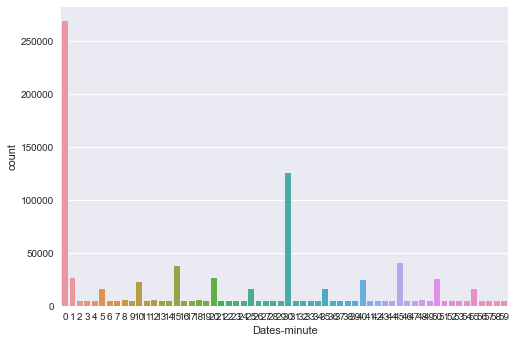

In [11]:
# 분별
sns.countplot(data=train, x='Dates-minute')

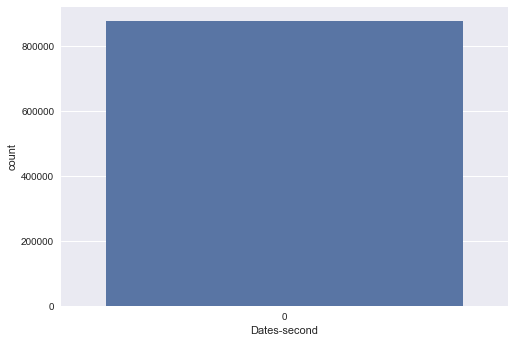

In [12]:
# 초별
sns.countplot(data=train, x='Dates-second')

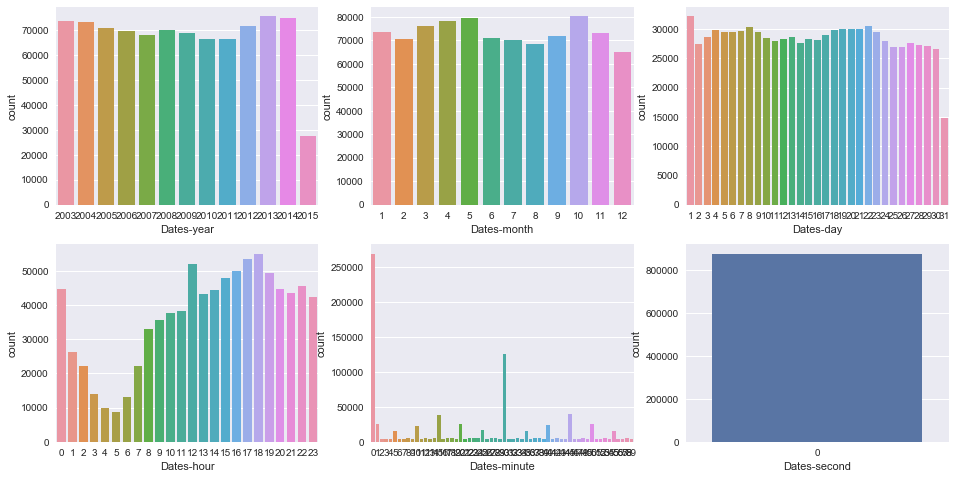

In [13]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(16,8)

sns.countplot(data=train, x='Dates-year', ax=ax1)
sns.countplot(data=train, x='Dates-month', ax=ax2)
sns.countplot(data=train, x='Dates-day', ax=ax3)
sns.countplot(data=train, x='Dates-hour', ax=ax4)
sns.countplot(data=train, x='Dates-minute', ax=ax5)
sns.countplot(data=train, x='Dates-second', ax=ax6)

* Date-second는 기록이 되고 있지 않음을 확인 가능

In [14]:
train[train['Dates-year'] == 2015]['Dates-month'].unique()

array([5, 4, 3, 2, 1])

* 2015년의 경우, 1-5월까지의 데이터만 기록됨
* 추후 drop 여부 체크

## Explore Dates-minute

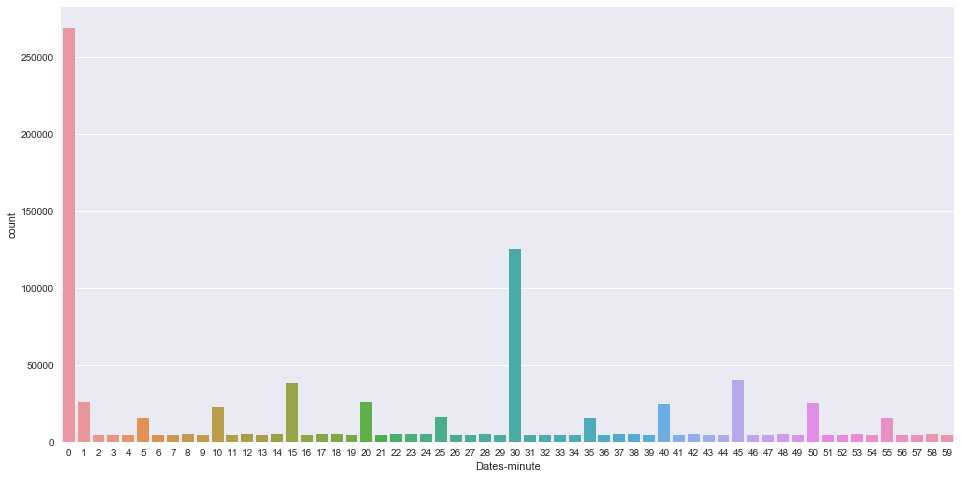

In [15]:
plt.figure(figsize=(16,8))
sns.countplot(data=train, x="Dates-minute", )

* 데이터가 분별로 정확하기 기록되고 있지 않고 있음.
* 5분 or 10분 간격으로 기록되고 있는 것 같음.
* 이를 정리하면 정확도가 상승할 것으로 보여짐

In [16]:
def concat_year_month(dates):
    return '{}-{}'.format(dates.year, dates.month)

train['Dates-year-month'] = train['Dates'].apply(concat_year_month)

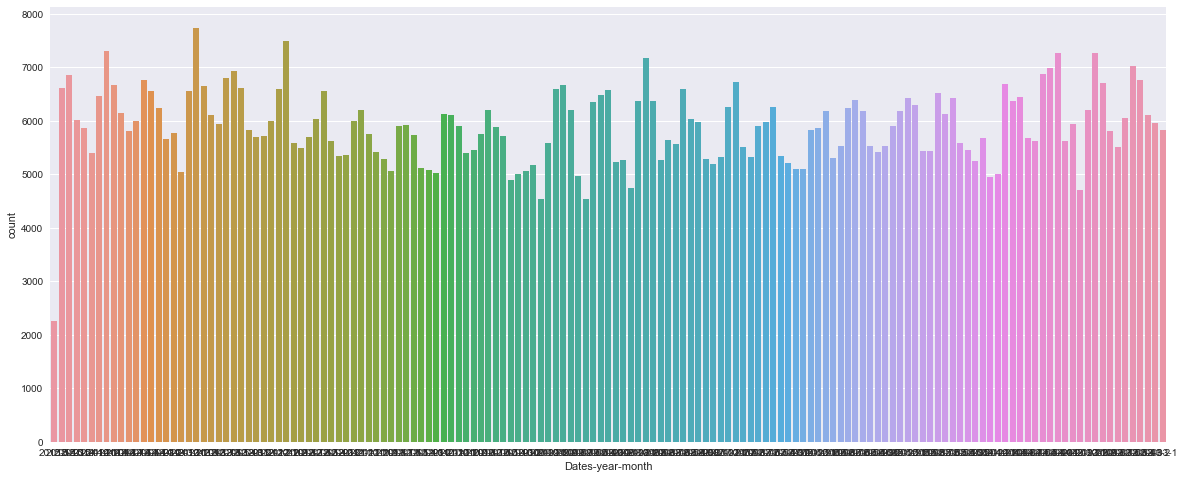

In [17]:
plt.figure(figsize=(20,8))
sns.countplot(data=train, x='Dates-year-month', )

In [18]:
month2003 = train[train['Dates'].dt.year == 2003]
month2004 = train[train['Dates'].dt.year == 2004]
month2005 = train[train['Dates'].dt.year == 2005]
month2006 = train[train['Dates'].dt.year == 2006]
month2007 = train[train['Dates'].dt.year == 2007]
month2008 = train[train['Dates'].dt.year == 2008]
month2009 = train[train['Dates'].dt.year == 2009]
month2010 = train[train['Dates'].dt.year == 2010]
month2011 = train[train['Dates'].dt.year == 2011]
month2012 = train[train['Dates'].dt.year == 2012]
month2013 = train[train['Dates'].dt.year == 2013]
month2014 = train[train['Dates'].dt.year == 2014]
month2015 = train[train['Dates'].dt.year == 2015]

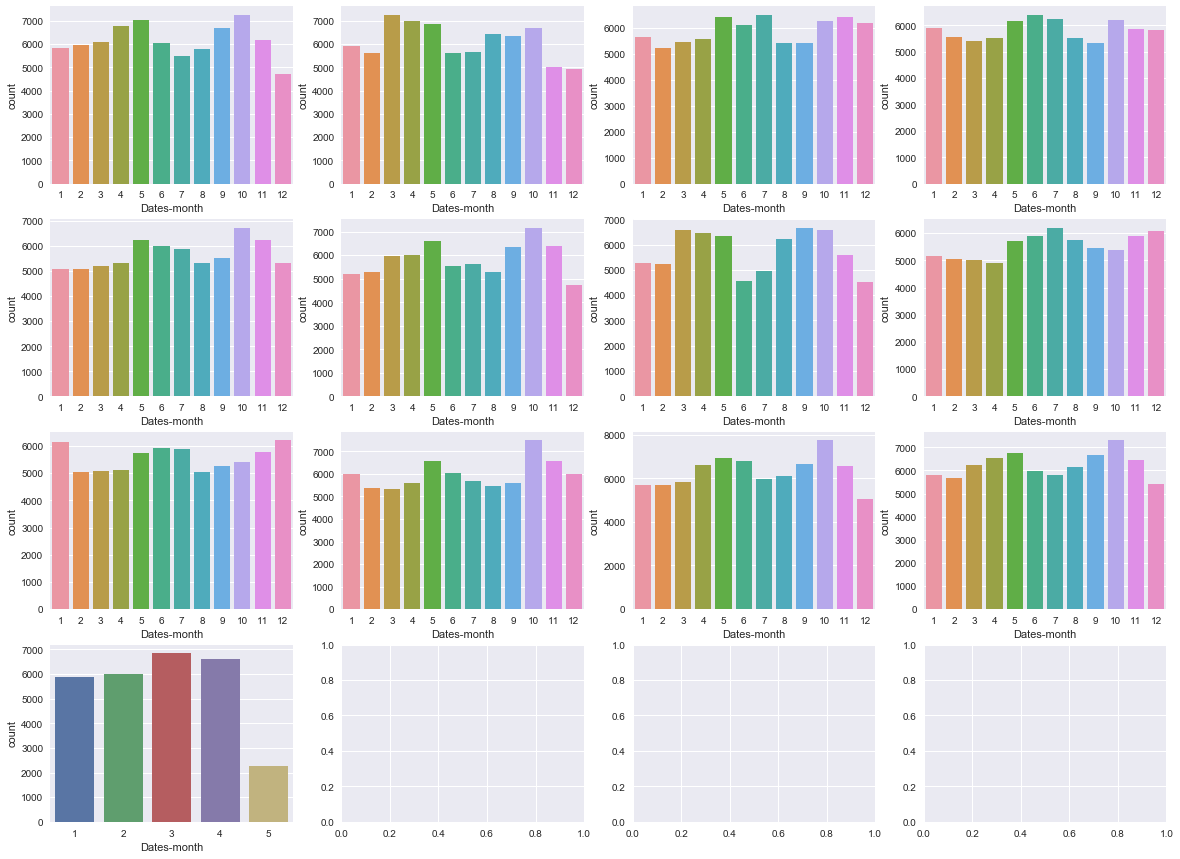

In [19]:
figure, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8),(ax9,ax10,ax11,ax12),(ax13,ax14,ax15,ax16)) = plt.subplots(nrows=4, ncols=4)
figure.set_size_inches(20,15)

sns.countplot(data=month2003, x="Dates-month", ax=ax1)
sns.countplot(data=month2004, x="Dates-month", ax=ax2)
sns.countplot(data=month2005, x="Dates-month", ax=ax3)
sns.countplot(data=month2006, x="Dates-month", ax=ax4)
sns.countplot(data=month2007, x="Dates-month", ax=ax5)
sns.countplot(data=month2008, x="Dates-month", ax=ax6)
sns.countplot(data=month2009, x="Dates-month", ax=ax7)
sns.countplot(data=month2010, x="Dates-month", ax=ax8)
sns.countplot(data=month2011, x="Dates-month", ax=ax9)
sns.countplot(data=month2012, x="Dates-month", ax=ax10)
sns.countplot(data=month2013, x="Dates-month", ax=ax11)
sns.countplot(data=month2014, x="Dates-month", ax=ax12)
sns.countplot(data=month2015, x="Dates-month", ax=ax13)

### Explore Seasonal

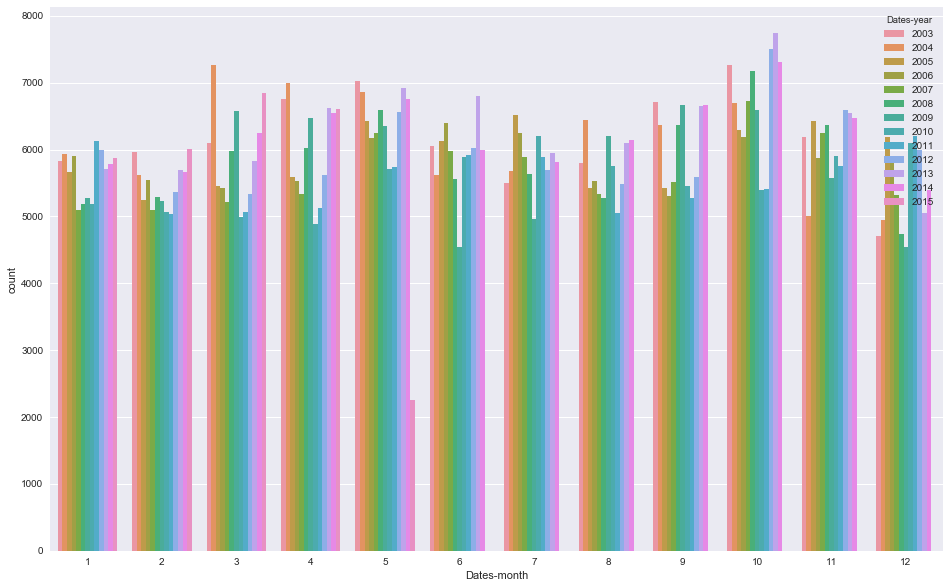

In [20]:
plt.figure(figsize=(16,10))
sns.countplot(data=train, x='Dates-month', hue='Dates-year')

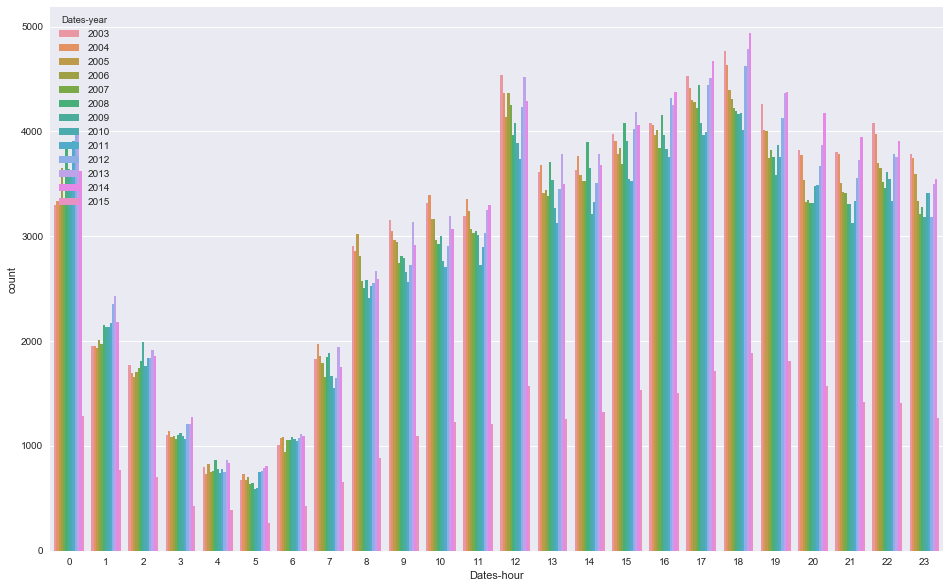

In [21]:
plt.figure(figsize=(16,10))
sns.countplot(data=train, x='Dates-hour', hue='Dates-year')

## Explore Address

In [22]:
def add_type(address):
    if '/' in address:
        return "CrossRoad"
    else:
        return "Block"
    
train['AddressType']= train['Address'].apply(add_type)

print(train.shape)
train[['Address','AddressType']].head()

(878049, 17)


,Address,AddressType
0,OAK ST / LAGUNA ST,CrossRoad
1,OAK ST / LAGUNA ST,CrossRoad
2,VANNESS AV / GREENWICH ST,CrossRoad
3,1500 Block of LOMBARD ST,Block
4,100 Block of BRODERICK ST,Block


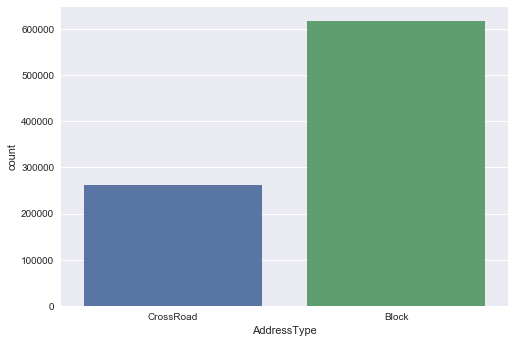

In [23]:
sns.countplot(data=train, x='AddressType')

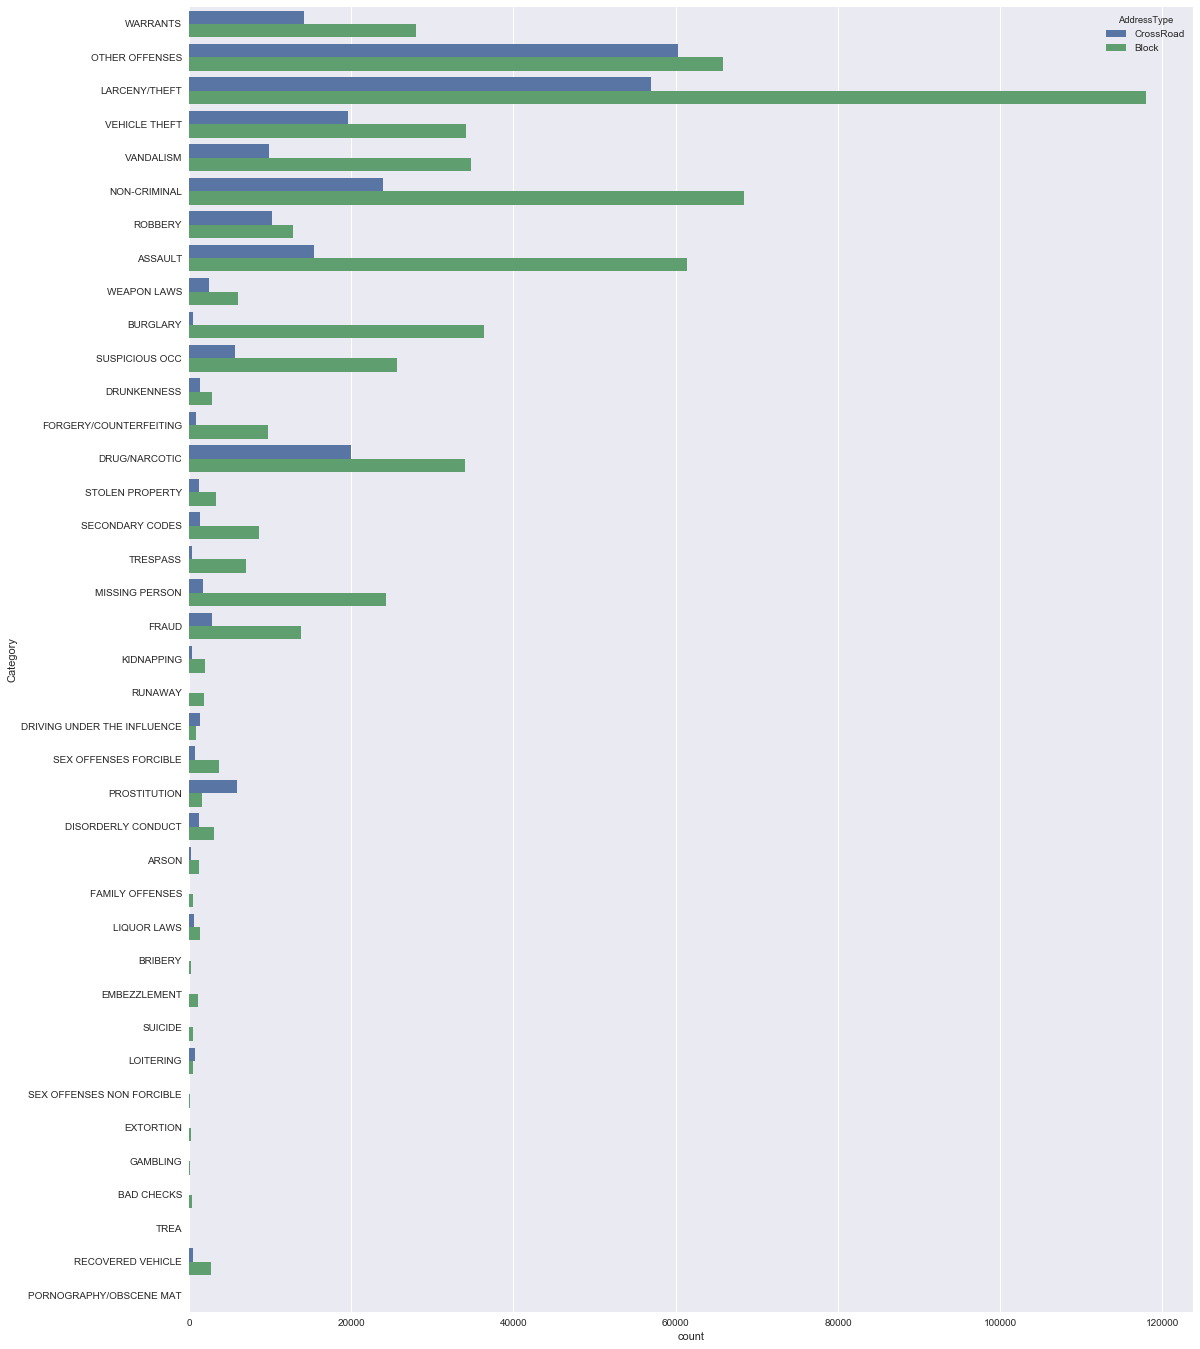

In [24]:
plt.figure(figsize=(18,24))
sns.countplot(data=train, y='Category', hue='AddressType')

* 주소에 '/'의 여부로 주소를 구분 가능
* 구분한 주소를 CrossRoad와 Block으로 구분
* 각 타입마다 빈번하게 일어나는 범죄의 종류가 다름을 확인

** Explore duplicated address **

In [25]:
oak_laguna = train[train["Address"] == 'OAK ST / LAGUNA ST']

print("The number of crimes at OAK ST / LAGUNA ST = {}".format(len(oak_laguna)))
oak_laguna[["Address", "Category"]].head()

The number of crimes at OAK ST / LAGUNA ST = 45


,Address,Category
0,OAK ST / LAGUNA ST,WARRANTS
1,OAK ST / LAGUNA ST,OTHER OFFENSES
12956,OAK ST / LAGUNA ST,OTHER OFFENSES
27204,OAK ST / LAGUNA ST,LARCENY/THEFT
65580,OAK ST / LAGUNA ST,DRUG/NARCOTIC


In [26]:
laguna_oak = train[train["Address"] == "LAGUNA ST / OAK ST"]
print("The number of crimes ad LAGUNA ST / OAK ST = {}".format(len(laguna_oak)))
laguna_oak[["Address", "Category"]].head()

The number of crimes ad LAGUNA ST / OAK ST = 27


,Address,Category
106008,LAGUNA ST / OAK ST,OTHER OFFENSES
154395,LAGUNA ST / OAK ST,VEHICLE THEFT
219632,LAGUNA ST / OAK ST,LARCENY/THEFT
283267,LAGUNA ST / OAK ST,VANDALISM
314544,LAGUNA ST / OAK ST,OTHER OFFENSES


# Reload Dateset

In [28]:
# train data
train = pd.read_csv('train.csv', parse_dates=["Dates"])
print(train.shape)
train.head()

(878049, 9)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [29]:
# test data
test = pd.read_csv('test.csv', parse_dates=["Dates"])
print(test.shape)
test.head()

(884262, 7)


,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Data columns (total 7 columns):
Id            884262 non-null int64
Dates         884262 non-null datetime64[ns]
DayOfWeek     884262 non-null object
PdDistrict    884262 non-null object
Address       884262 non-null object
X             884262 non-null float64
Y             884262 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 47.2+ MB


## Preprocessing

### Parse Dates

In [31]:
train["Dates-year"] = train['Dates'].dt.year
train["Dates-month"] = train['Dates'].dt.month
train["Dates-day"] = train['Dates'].dt.day
train["Dates-hour"] = train['Dates'].dt.hour
train["Dates-minute"] = train['Dates'].dt.minute
train["Dates-second"] = train['Dates'].dt.second

print(train.shape)
train[['Dates', 'Dates-year', 'Dates-month', 'Dates-day', 'Dates-hour', 'Dates-minute', 'Dates-second']]

(878049, 15)


,Dates,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
0,2015-05-13 23:53:00,2015,5,13,23,53,0
1,2015-05-13 23:53:00,2015,5,13,23,53,0
2,2015-05-13 23:33:00,2015,5,13,23,33,0
3,2015-05-13 23:30:00,2015,5,13,23,30,0
4,2015-05-13 23:30:00,2015,5,13,23,30,0
5,2015-05-13 23:30:00,2015,5,13,23,30,0
6,2015-05-13 23:30:00,2015,5,13,23,30,0
7,2015-05-13 23:30:00,2015,5,13,23,30,0
8,2015-05-13 23:00:00,2015,5,13,23,0,0
9,2015-05-13 23:00:00,2015,5,13,23,0,0


In [32]:
test["Dates-year"] = test["Dates"].dt.year
test["Dates-month"] = test["Dates"].dt.month
test["Dates-day"] = test["Dates"].dt.day
test["Dates-hour"] = test["Dates"].dt.hour
test["Dates-minute"] = test["Dates"].dt.minute
test["Dates-second"] = test["Dates"].dt.second

print(test.shape)
test[["Dates", "Dates-year", "Dates-month", "Dates-day", "Dates-hour", "Dates-minute", "Dates-second"]].head()

(884262, 13)


,Dates,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
0,2015-05-10 23:59:00,2015,5,10,23,59,0
1,2015-05-10 23:51:00,2015,5,10,23,51,0
2,2015-05-10 23:50:00,2015,5,10,23,50,0
3,2015-05-10 23:45:00,2015,5,10,23,45,0
4,2015-05-10 23:45:00,2015,5,10,23,45,0


### Encode DayofWeek

In [33]:
train_dayofweek = pd.get_dummies(train['DayOfWeek'], prefix='DayOfWeek', )
test_dayofweek = pd.get_dummies(test['DayOfWeek'], prefix='DayOfWeek', )

In [34]:
train = pd.concat([train, train_dayofweek], axis=1)
test = pd.concat([test, test_dayofweek], axis=1)
dow_cols = list(train_dayofweek.columns)

In [38]:
print("The list of DayOfWeek Cols = {0}".format(dow_cols))

The list of DayOfWeek Cols = ['DayOfWeek_Friday', 'DayOfWeek_Monday', 'DayOfWeek_Saturday', 'DayOfWeek_Sunday', 'DayOfWeek_Thursday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday']


In [39]:
train[["DayOfWeek"] + dow_cols].head()

,DayOfWeek,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,Wednesday,0,0,0,0,0,0,1
1,Wednesday,0,0,0,0,0,0,1
2,Wednesday,0,0,0,0,0,0,1
3,Wednesday,0,0,0,0,0,0,1
4,Wednesday,0,0,0,0,0,0,1


### Encode PdDistrict

In [40]:
train_pd = pd.get_dummies(train['PdDistrict'], prefix='PdDistrict')
test_pd = pd.get_dummies(train['PdDistrict'], prefix='PdDistrict')

train = pd.concat([train, train_pd], axis=1)
test = pd.concat([test, train_pd], axis=1)

In [43]:
train_pd_cols = list(train_pd.columns)
print("The list of PdDistrict columns = {}".format(train_pd_cols))

The list of PdDistrict columns = ['PdDistrict_BAYVIEW', 'PdDistrict_CENTRAL', 'PdDistrict_INGLESIDE', 'PdDistrict_MISSION', 'PdDistrict_NORTHERN', 'PdDistrict_PARK', 'PdDistrict_RICHMOND', 'PdDistrict_SOUTHERN', 'PdDistrict_TARAVAL', 'PdDistrict_TENDERLOIN']


### Convert all Dates-mins 30 if the current value of Date-mins is 0

In [59]:
train['Dates-minute_clean'] = train['Dates-minute']
train.loc[train["Dates-minute_clean"] == 0, 'Dates-minute_clean'] = 30

In [60]:
test['Dates-minute_clean']= test['Dates-minute']
test.loc[test['Dates-minute_clean'] == 0, 'Dates-minute_clean'] = 30

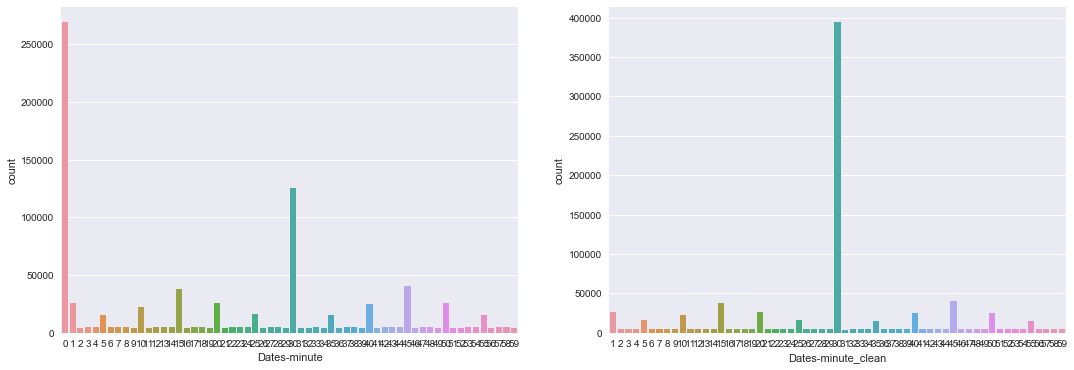

In [61]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 6)

sns.countplot(data=train, x='Dates-minute', ax=ax1)
sns.countplot(data=train, x='Dates-minute_clean', ax=ax2)

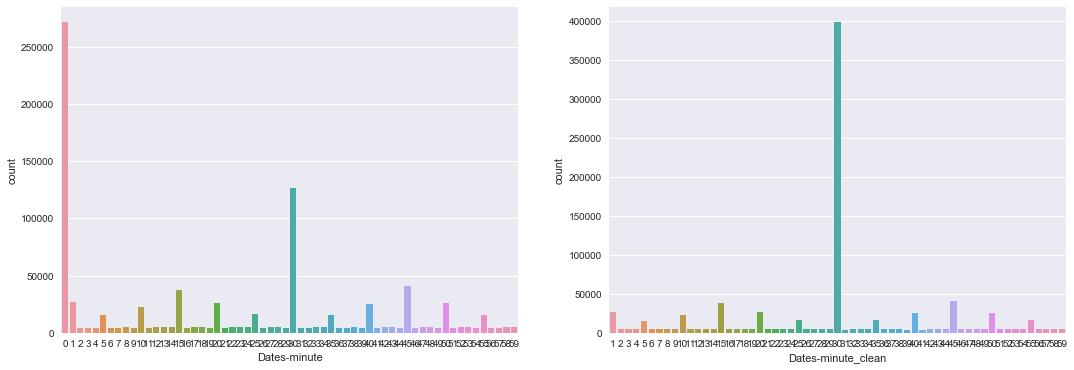

In [62]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 6)

sns.countplot(data=test, x='Dates-minute', ax=ax1)
sns.countplot(data=test, x='Dates-minute_clean', ax=ax2)

### Create the New Column named 'Address Type' from the Address column

In [66]:
train['Address_Crossroad'] = train['Address'].str.contains('/')
test['Address_Crossroad'] = test['Address'].str.contains('/')

In [68]:
train[['Address', 'Address_Crossroad']].head()

,Address,Address_Crossroad
0,OAK ST / LAGUNA ST,True
1,OAK ST / LAGUNA ST,True
2,VANNESS AV / GREENWICH ST,True
3,1500 Block of LOMBARD ST,False
4,100 Block of BRODERICK ST,False


### Convert to 'Others', if the total number of address is less than 100

In [73]:
major_add_list = train['Address'].value_counts()
major_add_list = major_add_list[major_add_list >= 100]
major_add_list = major_add_list.index

In [83]:
print('The number of major add list: {}'.format(len(major_add_list)))
major_add_list[:5]

The number of major add list: 1637


Index(['800 Block of BRYANT ST', '800 Block of MARKET ST',
       '2000 Block of MISSION ST', '1000 Block of POTRERO AV',
       '900 Block of MARKET ST'],
      dtype='object')